In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file = 'ai4i2020.csv'
data = pd.read_csv(file)
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [38]:
#INFO ABOUT ABBREVIATIONS

#TWF (Tool Wear Failure): Tool fails or is replaced after wear time (200–240 mins). 

#HDF (Heat Dissipation Failure): Process fails if air vs. process temp difference < 8.6 K and speed < 1380 rpm.

#PWF (Power Failure): Process fails if required power is < 3500 W or > 9000 W.                

#OSF (Overstrain Failure): Process fails if tool wear × torque > threshold (11,000–13,000 minNm, based on product).

#RNF (Random Failures): 0.1% chance of failure unrelated to process parameters.

In [22]:
# data preprocessing 

data_c = data.drop(columns=['UDI', 'Product ID'])

# remove Machine failure from data since it is the target prediction value
X = data_c.drop(columns=['Machine failure'])
y = data_c['Machine failure']

# type (M / L) isnt numerical --> onehot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_type = encoder.fit_transform(X[['Type']])
encoded_type_df = pd.DataFrame(encoded_type, columns=encoder.get_feature_names_out(['Type']), index=X.index)
# Replace X's non numerical with numerical one hot encoded
X = X.drop(columns=['Type']).join(encoded_type_df)



In [23]:
# test and train data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#Scaling data before running SVM over it, range [0,1]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Data example array, it prints the first 10 arrays, every column is a feature like type, rpm, k etc. It is scaled in range [0,1]
X_train_scaled[:10], y_train[:10]

(array([[-0.85406604, -0.60958879,  0.42763418, -0.89269644,  1.37503539,
         -0.06628895, -0.11136392, -0.09728167, -0.10050378, -0.04034408,
          0.82160932, -0.65894295],
        [-0.90401361, -1.08052803, -0.83494457,  1.38218727,  0.45762016,
         -0.06628895, -0.11136392, -0.09728167, -0.10050378, -0.04034408,
          0.82160932, -0.65894295],
        [-0.90401361, -1.48419023, -0.05967692, -0.89269644,  1.35921788,
         -0.06628895, -0.11136392, -0.09728167, -0.10050378, -0.04034408,
          0.82160932, -0.65894295],
        [ 0.44457086,  0.53412078,  0.33349453, -0.70228767, -1.59865535,
         -0.06628895, -0.11136392, -0.09728167, -0.10050378, -0.04034408,
         -1.21712349,  1.51758207],
        [ 0.69430873,  0.33228968,  0.178441  , -0.61209404,  1.58066294,
         -0.06628895, -0.11136392, -0.09728167, -0.10050378, -0.04034408,
          0.82160932, -0.65894295],
        [ 0.24478057,  0.33228968, -0.91800896,  0.74081037, -0.82359766,
      

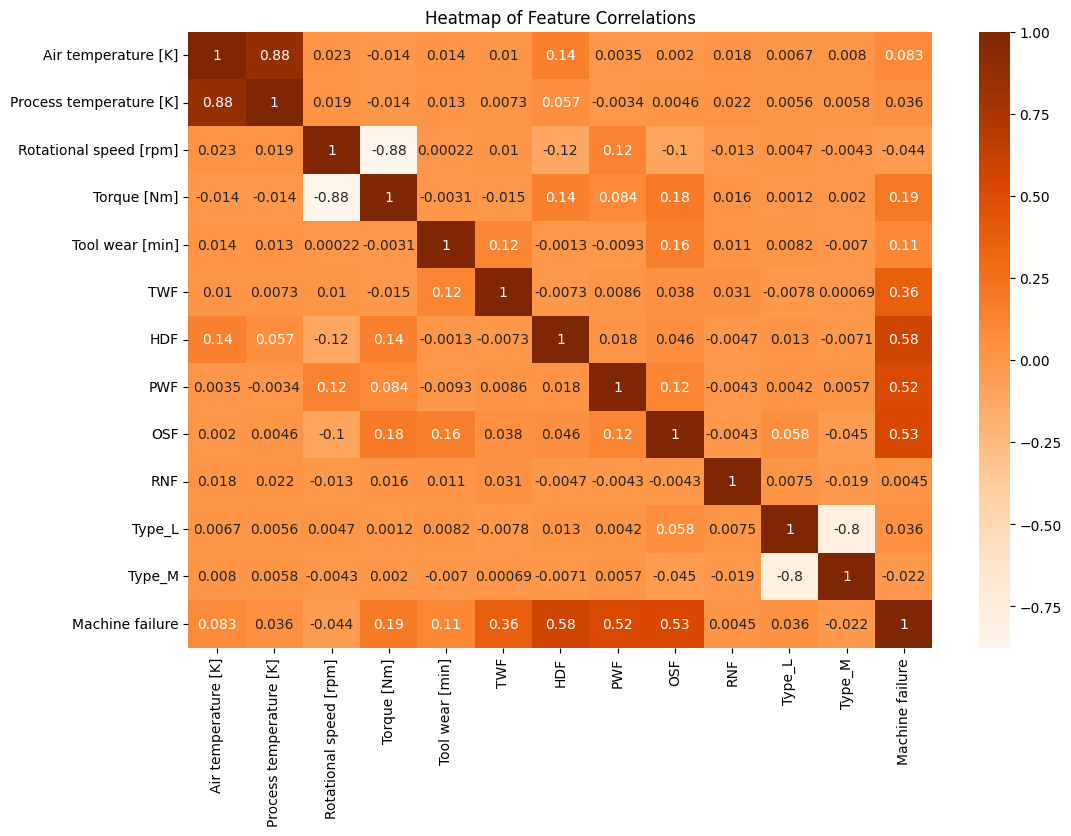

In [ ]:
# Simple heatmap below to see which feature correlate with machine failure and other features

# Update data to include one-hot encoded features
data = X.copy()
data['Machine failure'] = y

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.title('Heatmap of Feature Correlations')
plt.show()


In [44]:
# SVC start
svc = SVC(kernel='rbf', random_state=42)

# Train the SVC on training data
svc.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = svc.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Change the classification report to dataframe to make it looks noice
df_report = pd.DataFrame(report).transpose()

# Display df table & data info
print("Accuracy:", accuracy)
display(df_report)

print("\nSummary of Dataset:")
print(f"Total measurements: {len(data)}")
print(f"Total failures: {data['Machine failure'].sum()}")
print(f"Total non-failures: {len(data) - data['Machine failure'].sum()}")
print(f"Total Type L: {(data_c['Type'] == 'L').sum()}")
print(f"Total Type M: {(data_c['Type'] == 'M').sum()}")


Accuracy: 0.999


,precision,recall,f1-score,support
0,0.998970,1.000000,0.999485,1939.000
1,1.000000,0.967213,0.983333,61.000
accuracy,0.999000,0.999000,0.999000,0.999
macro avg,0.999485,0.983607,0.991409,2000.000
weighted avg,0.999001,0.999000,0.998992,2000.000



Summary of Dataset:
Total measurements: 10000
Total failures: 339
Total non-failures: 9661
Total Type L: 6000
Total Type M: 2997
